In [242]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (20,10)

In [243]:
# Uploading CSV of results
data_entries = pd.read_csv("data_entries.csv")
data_entries.dropna()
data_entries = data_entries.drop(columns=['Patient ID', 'Follow-up #', 'OriginalImagePixelSpacing[x', 'y]','OriginalImage[Width', 'Height]'])

pd.set_option('display.max_rows', 500)
data_entries

,Image Index,Finding Labels,Patient Age,Patient Gender,View Position
0,00000001_000.png,Cardiomegaly,58,M,PA
1,00000001_001.png,Cardiomegaly|Emphysema,58,M,PA
2,00000001_002.png,Cardiomegaly|Effusion,58,M,PA
3,00000002_000.png,No Finding,81,M,PA
4,00000003_000.png,Hernia,81,F,PA
...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,39,M,PA
112116,00030802_000.png,No Finding,29,M,PA
112117,00030803_000.png,No Finding,42,F,PA
112118,00030804_000.png,No Finding,30,F,PA


In [244]:
# Simplifying diagnosis column
def common_findings(findings):

    findings_list = findings.split("|")
    for i, val in enumerate(findings_list):
        if val == "Nodule":
            findings_list[i] = "Mass"
        elif val == "Infiltration" or val == "Pneumonia":
            findings_list[i] = "Consolidation"

    findings_list = list(set(findings_list))

    final_findings = ""
    for finding in findings_list:
        final_findings += finding + "|"

    if final_findings[-1] == "|":
        final_findings = final_findings[:-1]

    return final_findings

data_entries['Finding Labels'] = data_entries['Finding Labels'].apply(common_findings)

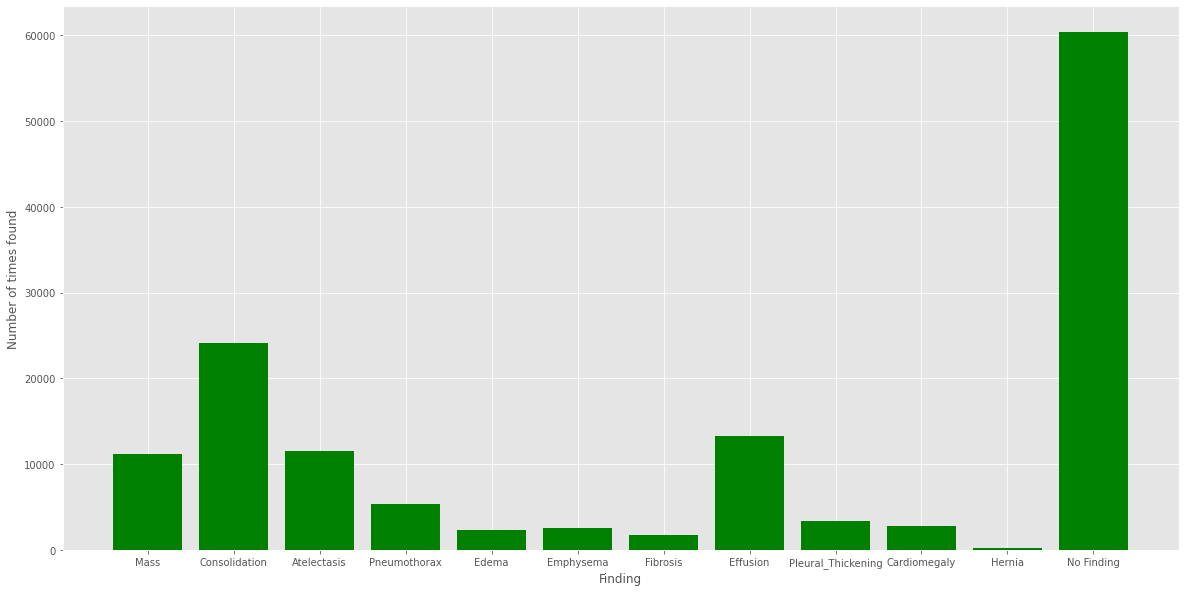

In [245]:
# Checking data imbalance
x = ['Mass', 'Consolidation', 'Atelectasis', 'Pneumothorax', 'Edema', 'Emphysema', 'Fibrosis', 'Effusion', 'Pleural_Thickening', 'Cardiomegaly', 'Hernia', 'No Finding']
findings_count = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
x_pos = [i for i, _ in enumerate(x)]

def count_findings(findings):
    findings_list = findings.split("|")
    for finding in findings_list:
        if finding == "Mass":
            findings_count[0] += 1
        elif finding == "Consolidation":
            findings_count[1] += 1
        elif finding == "Atelectasis":
            findings_count[2] += 1
        elif finding == "Pneumothorax":
            findings_count[3] += 1
        elif finding == "Edema":
            findings_count[4] += 1
        elif finding == "Emphysema":
            findings_count[5] += 1
        elif finding == "Fibrosis":
            findings_count[6] += 1
        elif finding == "Effusion":
            findings_count[7] += 1
        elif finding == "Pleural_Thickening":
            findings_count[8] += 1
        elif finding == "Cardiomegaly":
            findings_count[9] += 1
        elif finding == "Hernia":
            findings_count[10] += 1
        elif finding == "No Finding":
            findings_count[11] += 1

data_entries['Finding Labels'].apply(count_findings)

plt.bar(x_pos, findings_count, color='green')
plt.xlabel("Finding")
plt.ylabel("Number of times found")
plt.xticks(x_pos, x)
plt.show()
